In [4]:
import numpy as np
import pandas as pd

#### Задания для выполнения
1. Чтение excel файла и составление описательной статистики по набранному баллу

In [5]:
pandas_reader = pd.read_excel("./data/Вариант 1.xlsx")
score = pandas_reader["Unnamed: 9"][2:3050]

score_array = np.array(score, dtype="int")
print(score_array)
score_mean = np.mean(score_array)
print(score_mean)


[ 20  20  22 ... 100 100 100]
72.76902887139107


3. Найдите процент учащихся, выполнивших работу ниже среднего

In [6]:
print(count_below_average := len(score_array[score_array<score_mean]))
percentage_below_average = round(count_below_average/len(score_array) * 100, 3)
print(f"{percentage_below_average}%")

1563
51.28%


4. Найти процент учащихся не сдавших экзамен

In [7]:
minimal_score = pandas_reader["Unnamed: 10"][2]

print(count_not_passed := len(score_array[score_array<minimal_score]))
percentage_not_passed = round(count_not_passed/len(score_array) * 100, 3)
print(f"{percentage_not_passed}%")

4
0.131%


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

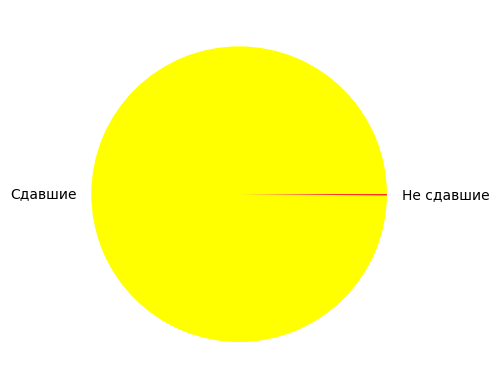

In [13]:
from turtle import back
import matplotlib.pyplot as plt

labels = ["Сдавшие", "Не сдавшие"]
values = [100 - percentage_not_passed, percentage_not_passed]
colors = ["yellow", "red"]

plt.pie(values, labels=labels, colors=colors)
plt.show()

6. Постройте ядерную оценку плотности распределению баллов за экзамен

[[ 20]
 [ 20]
 [ 22]
 ...
 [100]
 [100]
 [100]]


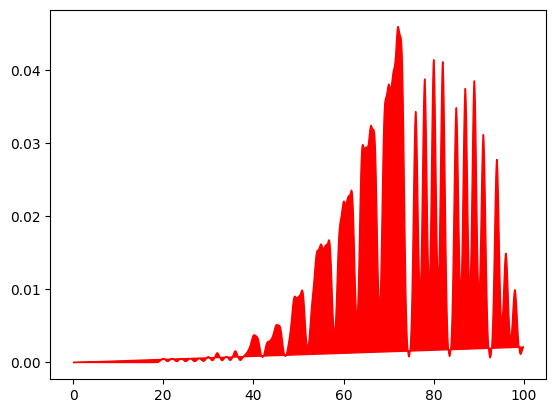

In [17]:
from sklearn.neighbors import KernelDensity

score_array_2d = score_array.reshape(-1, 1)

kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(score_array_2d)
x_test = np.linspace(0, 100, 2000)[:, np.newaxis]
log_dens = kde.score_samples(x_test)

plt.fill(x_test, np.exp(log_dens), c="red")
plt.show()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


- Русский язык:

- 0-35 баллов соответствуют оценке 2,
- 36-56 баллов - оценка 3,
- 57-71 баллов - оценка 4,
- 72 баллов и выше - оценка 5;

In [15]:
count_excellent = len(score_array[score_array>71])
count_good = len(score_array[(score_array>56)*(score_array<=71)])
count_acceptable = len(score_array[(score_array>35)*(score_array<=56)])
count_not_acceptable = len(score_array[score_array<36])

print(count_excellent, count_good, count_acceptable, count_not_acceptable)
print(count_excellent + count_good + count_acceptable + count_not_acceptable)

percentage_excellent = round(count_excellent/len(score_array) * 100, 3)
percentage_good = round(count_good/len(score_array) * 100, 3)
percentage_acceptable = round(count_acceptable/len(score_array) * 100, 3)
percentage_not_acceptable = round(count_not_acceptable/len(score_array) * 100, 3)

print(percentage_excellent, percentage_good, percentage_acceptable, percentage_not_acceptable)

1625 1050 352 21
3048
53.314 34.449 11.549 0.689


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [16]:
gender_data = pandas_reader["Unnamed: 3"][2:3050]

count_male = len(gender_data[gender_data=="М"])
count_female = len(gender_data[gender_data=="Ж"])

percentage_male = round(count_male / len(gender_data) * 100, 3)
percentage_female = round(count_female / len(gender_data) * 100, 3)

print(percentage_male, percentage_female)
print(percentage_male + percentage_female)

42.028 57.972
100.0


9. Сколько школ принимало участие в экзамене?

In [17]:
school_data = pandas_reader["Unnamed: 1"][2:3050]

unique_school_array = school_data.unique()

print(len(unique_school_array))



24


#### Дополнительные задания

1. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [18]:
import re

short_answer_data = pandas_reader["Unnamed: 5"][3049]

print(len(short_answer_data))

long_answer_data = pandas_reader["Unnamed: 6"][3049]

ans = re.findall(r"\(\d\)", long_answer_data)
print(len(ans))

25
12


2. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [19]:

from itertools import repeat


b_answer_data = pandas_reader["Unnamed: 5"][2:3050]
answerCount = [i for i in repeat(0, 24)]

def check_answer(x):
    for i in range(24):
        if x[i] != "-" and x[i] != "0":
            answerCount[i] += 1


b_answer_data.map(check_answer)

print(answerCount)


for i in range(24):
    print(f"B_{str(i+1).rjust(2, '0')}: {round(answerCount[i]/3048*100, 2)}%")



[3008, 2831, 2662, 2356, 1797, 2762, 2897, 2304, 2564, 2953, 2840, 2302, 2534, 2139, 2975, 2102, 2049, 2261, 2114, 2522, 2190, 1465, 2333, 755]
B_01: 98.69%
B_02: 92.88%
B_03: 87.34%
B_04: 77.3%
B_05: 58.96%
B_06: 90.62%
B_07: 95.05%
B_08: 75.59%
B_09: 84.12%
B_10: 96.88%
B_11: 93.18%
B_12: 75.52%
B_13: 83.14%
B_14: 70.18%
B_15: 97.6%
B_16: 68.96%
B_17: 67.22%
B_18: 74.18%
B_19: 69.36%
B_20: 82.74%
B_21: 71.85%
B_22: 48.06%
B_23: 76.54%
B_24: 24.77%


3. Аналогично и с типом С (ответы с развернутым ответом)

In [20]:
from itertools import repeat
import re

c_answer_data = pandas_reader["Unnamed: 6"][2:3050]
answerCount = [i for i in repeat(0, 12)]

def check_answer(x):
    x = re.sub(r"\(\d\)", "", x)
    for i in range(12):
        if x[i] != "0":
            answerCount[i] += 1


c_answer_data.map(check_answer)

print(answerCount)


for i in range(12):
    print(f"C_{str(i+1).rjust(2, '0')}: {round(answerCount[i]/3048*100, 2)}%")

[2949, 2887, 2879, 2873, 2940, 2970, 2816, 2484, 2566, 2491, 2987, 2577]
C_01: 96.75%
C_02: 94.72%
C_03: 94.46%
C_04: 94.26%
C_05: 96.46%
C_06: 97.44%
C_07: 92.39%
C_08: 81.5%
C_09: 84.19%
C_10: 81.73%
C_11: 98.0%
C_12: 84.55%


4. Сделайте анализ по двум школам:
    i. по всем выполненным заданиям типа В
    ii. по заданиям типа С больше 50%
    iii. по среднему баллу юношей и девушек

Для выполнения задания будем использовать данные по школам 148 и 152

In [21]:
school_148_male_score = []
school_148_female_score = []

school_152_male_score = []
school_152_female_score = []

for i in range(2, len(score)):
    if school_data[i] == 148:
        if gender_data[i] == "М":
           school_148_male_score.append(score[i])
        if gender_data[i] == "Ж":
            school_148_female_score.append(score[i])
    if school_data[i] == 152:
        if gender_data[i] == "М":
            school_152_male_score.append(score[i])
        if gender_data[i] == "Ж":
            school_152_female_score.append(score[i])


print(np.mean(school_148_male_score))
print(np.mean(school_148_female_score))

print(np.mean(school_152_male_score))
print(np.mean(school_152_female_score))

68.16666666666667
75.74585635359117
64.36241610738254
73.3021978021978
